In [7]:
from io import BytesIO
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook
sns.set(style="whitegrid")

In [66]:
# load data
gdoc_url = 'https://docs.google.com/spreadsheets/d/1X1HTxkI6SqsdpNSkSSivMzpxNT-oeTbjFFDdEkXD30o/export?format=csv&id=1X1HTxkI6SqsdpNSkSSivMzpxNT-oeTbjFFDdEkXD30o&gid=695409533'
r = requests.get(gdoc_url)
data = r.content
df = pd.read_csv(BytesIO(data), index_col=None, header=0)

In [67]:
#preprocess data
df['Reviewer Rating'] = pd.to_numeric(df['Reviewer Rating'], errors='coerce')
df = df[['Whisky Name','Reviewer Rating', 'Whisky Region or Style']]
# df = df.dropna()

#homogenize region names
df['Whisky Region or Style'] = df['Whisky Region or Style'].str.lower()
df['Whisky Region or Style'] = df['Whisky Region or Style'].str.rstrip('s')

# only consider a 0-100 system, hopefully
df = df[df['Reviewer Rating'] > 40]

# By Region

In [68]:
df_region = df.groupby('Whisky Region or Style').filter(lambda x: len(x) > 50)
# df_region.reset_index().drop('index',axis=1)

In [69]:
sort = df_region.groupby('Whisky Region or Style').aggregate([np.count_nonzero,np.median]).sort_values(by=('Reviewer Rating','median'))
order = sort.index[::-1]
count = sort[('Reviewer Rating','count_nonzero')].values[::-1]

<IPython.core.display.Javascript object>


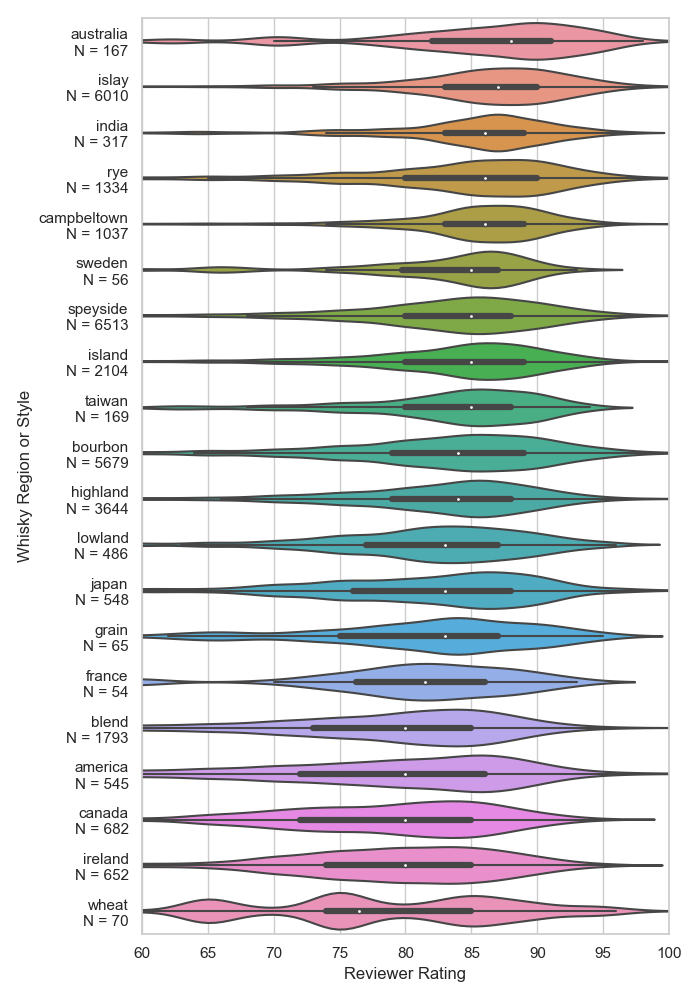

[Text(0, 0, 'australia\nN = 167'),
 Text(0, 1, 'islay\nN = 6010'),
 Text(0, 2, 'india\nN = 317'),
 Text(0, 3, 'rye\nN = 1334'),
 Text(0, 4, 'campbeltown\nN = 1037'),
 Text(0, 5, 'sweden\nN = 56'),
 Text(0, 6, 'speyside\nN = 6513'),
 Text(0, 7, 'island\nN = 2104'),
 Text(0, 8, 'taiwan\nN = 169'),
 Text(0, 9, 'bourbon\nN = 5679'),
 Text(0, 10, 'highland\nN = 3644'),
 Text(0, 11, 'lowland\nN = 486'),
 Text(0, 12, 'japan\nN = 548'),
 Text(0, 13, 'grain\nN = 65'),
 Text(0, 14, 'france\nN = 54'),
 Text(0, 15, 'blend\nN = 1793'),
 Text(0, 16, 'america\nN = 545'),
 Text(0, 17, 'canada\nN = 682'),
 Text(0, 18, 'ireland\nN = 652'),
 Text(0, 19, 'wheat\nN = 70')]

In [71]:
plt.figure(figsize=(7,10))
ax = sns.violinplot(y='Whisky Region or Style', x='Reviewer Rating', data=df_region, order=order, scale='width', bw=0.2)
ax.set_xlim(60,100)
# ax.tick_params(axis='y',labelrotation=45)
plt.tight_layout()

for i, label in enumerate(ax.get_yticklabels()):
    label.set_text(order[i] + '\n' + 'N = ' +  str(int(count[i])))
ax.set_yticklabels(ax.get_yticklabels())

# By Whisky

In [83]:
#extract first three words
df_whisky = df.copy()
df_whisky.loc[:,'Whisky Name'] = df_whisky['Whisky Name'].str.extract('([^\ ]+[\ ]*[^\ ]*[\ ]*[^\ ]*)',expand=False)
df_whisky = df_whisky.groupby('Whisky Name').filter(lambda x: len(x) > 10)
df_whisky

,Whisky Name,Reviewer Rating,Whisky Region or Style
5,1792 Full Proof,85.0,bourbon
6,1792 Full Proof,69.0,bourbon
7,1792 Full Proof,85.0,bourbon
8,1792 Full Proof,78.0,bourbon
9,1792 Full Proof,87.0,bourbon
...,...,...,...
33185,Laphroaig Quarter Cask,66.0,islay
33208,Wild Turkey 101,70.0,bourbon
33214,Springbank 15,90.0,campbeltown
33217,Elements of Islay,87.0,islay


In [85]:
#how many whiskies

n = 20

sort = df_whisky.groupby('Whisky Name').aggregate([np.count_nonzero,np.median]).sort_values(by=('Reviewer Rating','median')).tail(n)
order = sort.index[::-1]
count = sort[('Reviewer Rating','count_nonzero')].values[::-1]

<IPython.core.display.Javascript object>


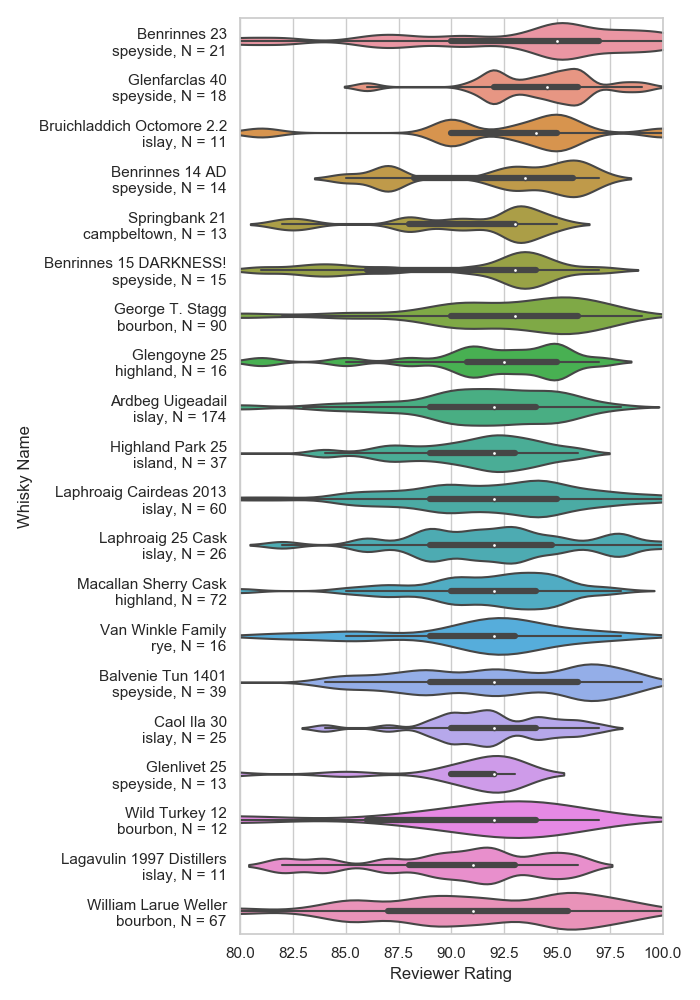

[Text(0, 0, 'Benrinnes 23\nspeyside, N = 21'),
 Text(0, 1, 'Glenfarclas 40\nspeyside, N = 18'),
 Text(0, 2, 'Bruichladdich Octomore 2.2\nislay, N = 11'),
 Text(0, 3, 'Benrinnes 14 AD\nspeyside, N = 14'),
 Text(0, 4, 'Springbank 21\ncampbeltown, N = 13'),
 Text(0, 5, 'Benrinnes 15 DARKNESS!\nspeyside, N = 15'),
 Text(0, 6, 'George T. Stagg\nbourbon, N = 90'),
 Text(0, 7, 'Glengoyne 25\nhighland, N = 16'),
 Text(0, 8, 'Ardbeg Uigeadail\nislay, N = 174'),
 Text(0, 9, 'Highland Park 25\nisland, N = 37'),
 Text(0, 10, 'Laphroaig Cairdeas 2013\nislay, N = 60'),
 Text(0, 11, 'Laphroaig 25 Cask\nislay, N = 26'),
 Text(0, 12, 'Macallan Sherry Cask\nhighland, N = 72'),
 Text(0, 13, 'Van Winkle Family\nrye, N = 16'),
 Text(0, 14, 'Balvenie Tun 1401\nspeyside, N = 39'),
 Text(0, 15, 'Caol Ila 30\nislay, N = 25'),
 Text(0, 16, 'Glenlivet 25\nspeyside, N = 13'),
 Text(0, 17, 'Wild Turkey 12\nbourbon, N = 12'),
 Text(0, 18, 'Lagavulin 1997 Distillers\nislay, N = 11'),
 Text(0, 19, 'William Larue Well

In [86]:
plt.figure(figsize=(7,10))
ax = sns.violinplot(y='Whisky Name', x='Reviewer Rating', data=df_whisky, order=order, scale='width', bw=0.18)
ax.set_xlim(80,100)
# ax.tick_params(axis='y',labelrotation=45)
plt.tight_layout()

for i, label in enumerate(ax.get_yticklabels()):
    region = df_whisky[df_whisky['Whisky Name'] == label.get_text()].iloc[0,2]
    label.set_text(order[i] + '\n' + region + ', N = ' +  str(int(count[i])))
ax.set_yticklabels(ax.get_yticklabels())

# By both

In [88]:
#extract first three words
region = 'islay'

df_whisky = df.copy()
df_whisky = df_whisky[df_whisky['Whisky Region or Style'] == region]
df_whisky.loc[:,'Whisky Name'] = df_whisky['Whisky Name'].str.extract('([^\ ]+[\ ]*[^\ ]*[\ ]*[^\ ]*)',expand=False)
df_whisky = df_whisky.groupby('Whisky Name').filter(lambda x: len(x) > 10)

In [89]:
#how many whiskies

n = 20

sort = df_whisky.groupby(df_whisky['Whisky Name'].str.extract('([^\ ]+[\ ]*[^\ ]*[\ ]*[^\ ]*)',expand=False)).aggregate([np.count_nonzero,np.median]).sort_values(by=('Reviewer Rating','median')).tail(n)
order = sort.index[::-1]
count = sort[('Reviewer Rating','count_nonzero')].values[::-1]

<IPython.core.display.Javascript object>


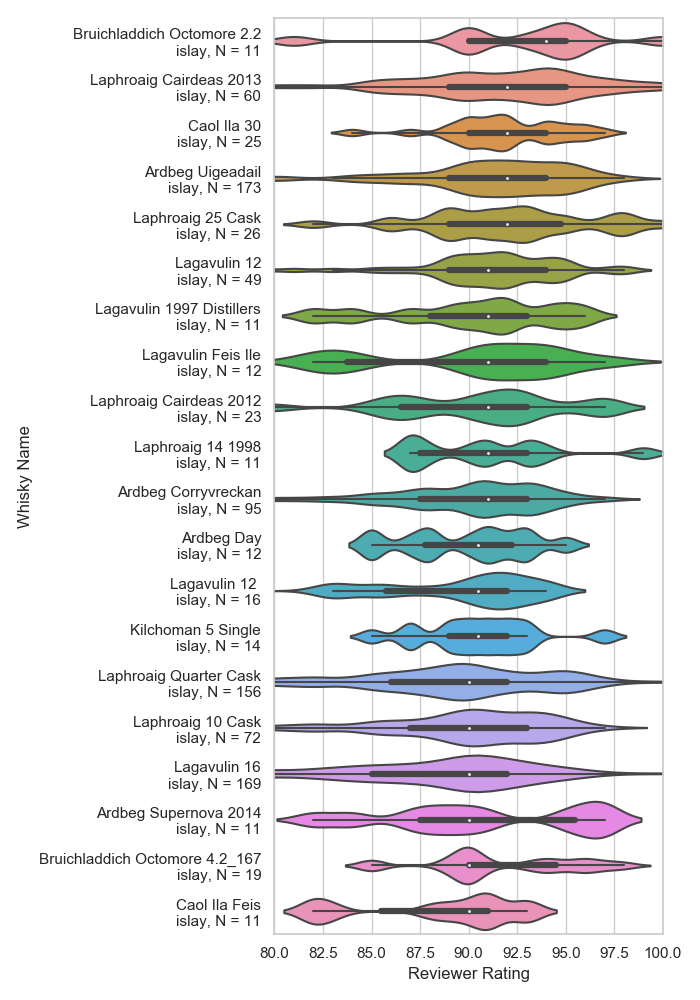

[Text(0, 0, 'Bruichladdich Octomore 2.2\nislay, N = 11'),
 Text(0, 1, 'Laphroaig Cairdeas 2013\nislay, N = 60'),
 Text(0, 2, 'Caol Ila 30\nislay, N = 25'),
 Text(0, 3, 'Ardbeg Uigeadail\nislay, N = 173'),
 Text(0, 4, 'Laphroaig 25 Cask\nislay, N = 26'),
 Text(0, 5, 'Lagavulin 12\nislay, N = 49'),
 Text(0, 6, 'Lagavulin 1997 Distillers\nislay, N = 11'),
 Text(0, 7, 'Lagavulin Feis Ile\nislay, N = 12'),
 Text(0, 8, 'Laphroaig Cairdeas 2012\nislay, N = 23'),
 Text(0, 9, 'Laphroaig 14 1998\nislay, N = 11'),
 Text(0, 10, 'Ardbeg Corryvreckan\nislay, N = 95'),
 Text(0, 11, 'Ardbeg Day\nislay, N = 12'),
 Text(0, 12, 'Lagavulin 12 \nislay, N = 16'),
 Text(0, 13, 'Kilchoman 5 Single\nislay, N = 14'),
 Text(0, 14, 'Laphroaig Quarter Cask\nislay, N = 156'),
 Text(0, 15, 'Laphroaig 10 Cask\nislay, N = 72'),
 Text(0, 16, 'Lagavulin 16\nislay, N = 169'),
 Text(0, 17, 'Ardbeg Supernova 2014\nislay, N = 11'),
 Text(0, 18, 'Bruichladdich Octomore 4.2_167\nislay, N = 19'),
 Text(0, 19, 'Caol Ila Feis\ni

In [90]:
plt.figure(figsize=(7,10))
ax = sns.violinplot(y='Whisky Name', x='Reviewer Rating', data=df_whisky, order=order, scale='width', bw=0.18)
ax.set_xlim(80,100)
# ax.tick_params(axis='y',labelrotation=45)
plt.tight_layout()

for i, label in enumerate(ax.get_yticklabels()):
    region = df_whisky[df_whisky['Whisky Name'] == label.get_text()].iloc[0,2]
    label.set_text(order[i] + '\n' + region + ', N = ' +  str(int(count[i])))
ax.set_yticklabels(ax.get_yticklabels())